<a href="https://colab.research.google.com/github/vishal1076/FMML_Projects/blob/main/Module4_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

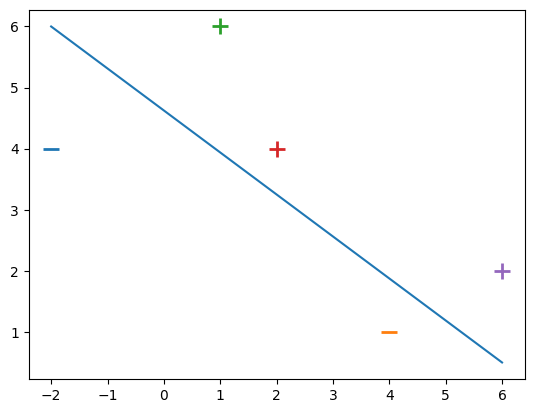

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

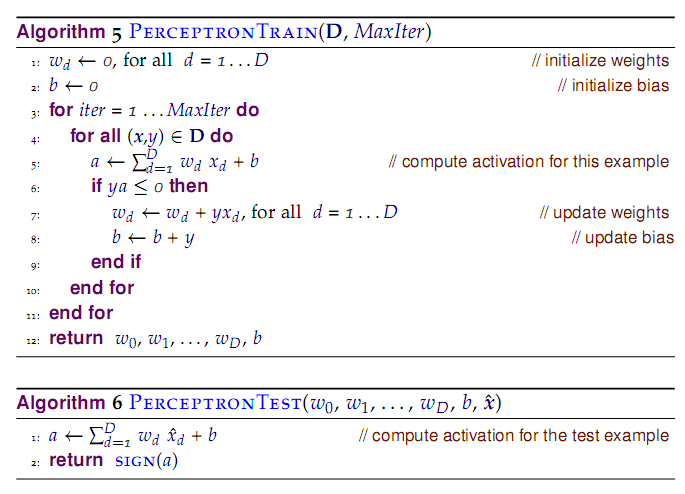

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

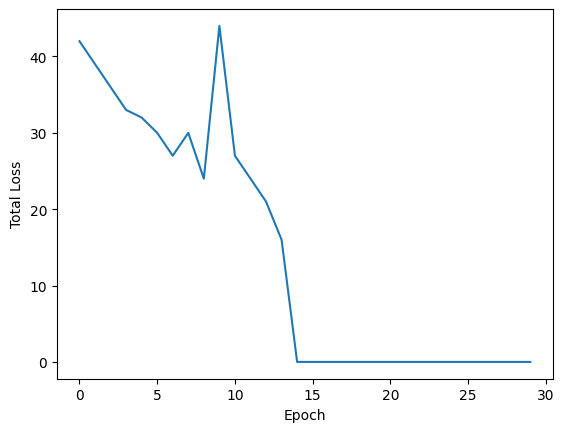

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

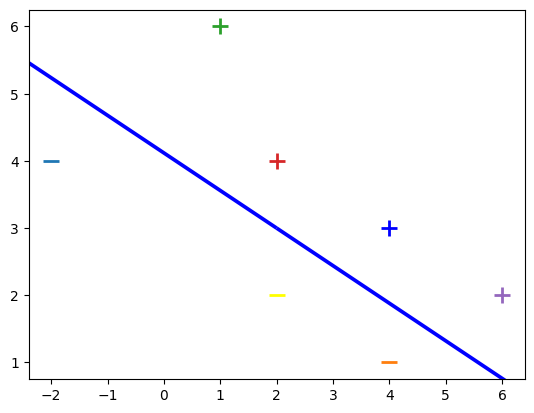

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



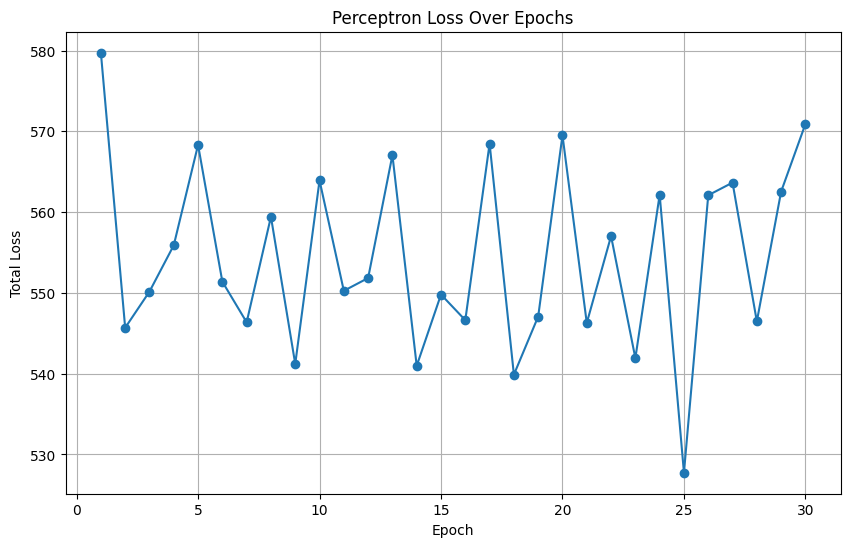

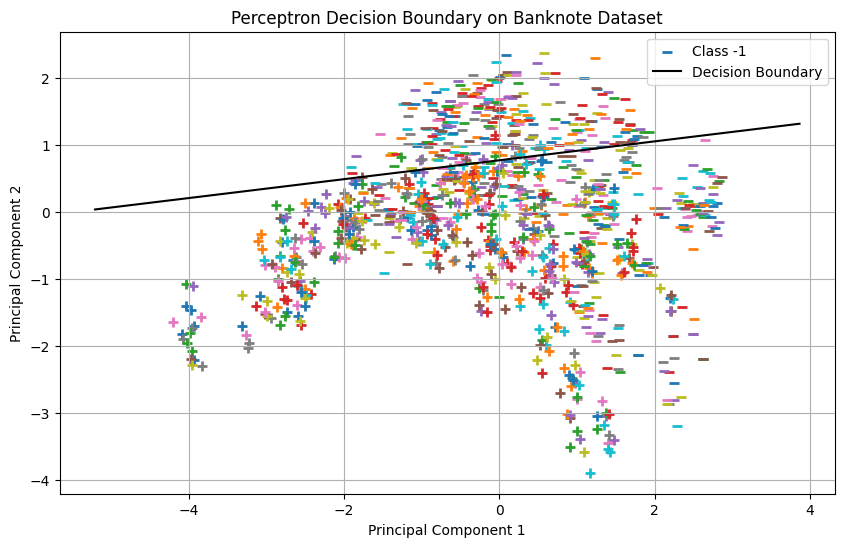

In [10]:
# 1.Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
data = pd.read_csv(url, header=None, names=columns)

# Features and labels
X = data[['variance', 'skewness', 'curtosis', 'entropy']].values
y = data['class'].values
# Convert labels from {0,1} to {-1,1}
y = np.where(y == 0, -1, 1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

# For visualization, reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Add bias term
X_train_pca = np.hstack((X_train_pca, np.ones((X_train_pca.shape[0], 1))))
X_test_pca = np.hstack((X_test_pca, np.ones((X_test_pca.shape[0], 1))))

# Perceptron functions (as provided)
def perceptron_algo_plot(X, Y):
    '''
    Train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n+1), errors, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Perceptron Loss Over Epochs')
    plt.grid(True)
    plt.show()

    return w

# Train the perceptron
w = perceptron_algo_plot(X_train_pca, y_train)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
for i, sample in enumerate(X_train_pca):
    if y_train[i] == -1:
        plt.scatter(sample[0], sample[1], s=60, marker='_', linewidths=2, label='Class -1' if i == 0 else "")
    else:
        plt.scatter(sample[0], sample[1], s=60, marker='+', linewidths=2, label='Class +1' if i == 0 else "")

# Define the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx = np.linspace(x_min, x_max, 100)
if w[1] != 0:
    yy = -(w[0] * xx + w[2]) / w[1]
    plt.plot(xx, yy, 'k-', label='Decision Boundary')
else:
    plt.axvline(-w[2]/w[0], color='k', linestyle='-', label='Decision Boundary')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Perceptron Decision Boundary on Banknote Dataset')
plt.legend()
plt.grid(True)
plt.show()


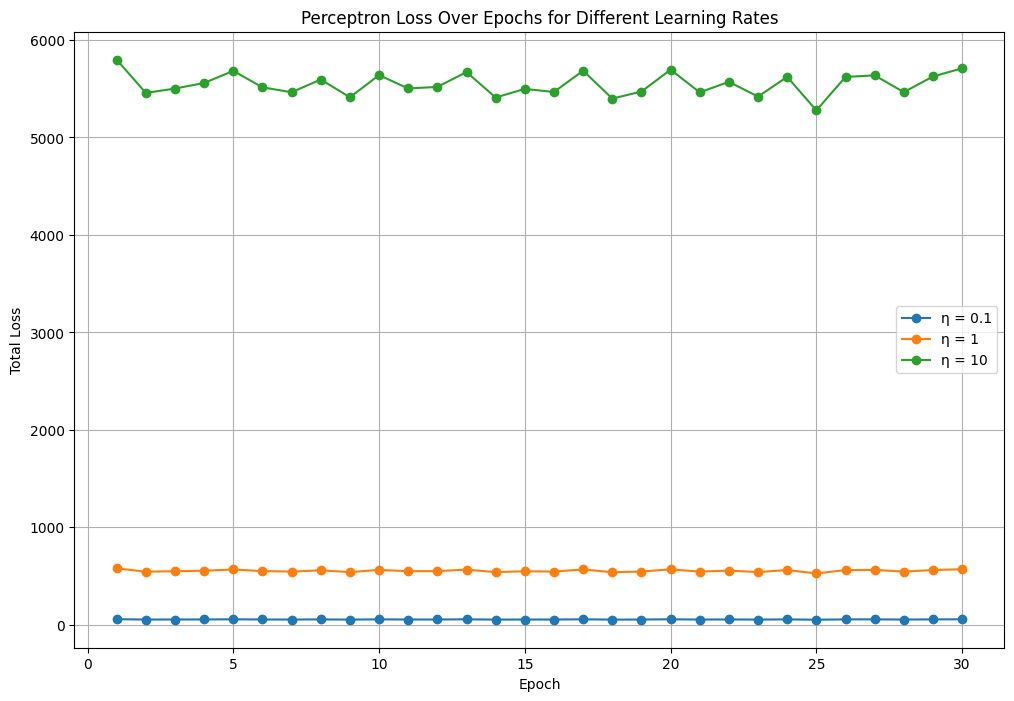

In [11]:

# 2.Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
def perceptron_algo_plot(X, Y, eta=1):
    '''
    Train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :param eta: learning rate
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(range(1, n+1), errors, marker='o', label=f'η = {eta}')

    return w

# Plot configurations
plt.figure(figsize=(12, 8))
etas = [0.1, 1, 10]

for eta in etas:
    w = perceptron_algo_plot(X_train_pca, y_train, eta=eta)

plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Perceptron Loss Over Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


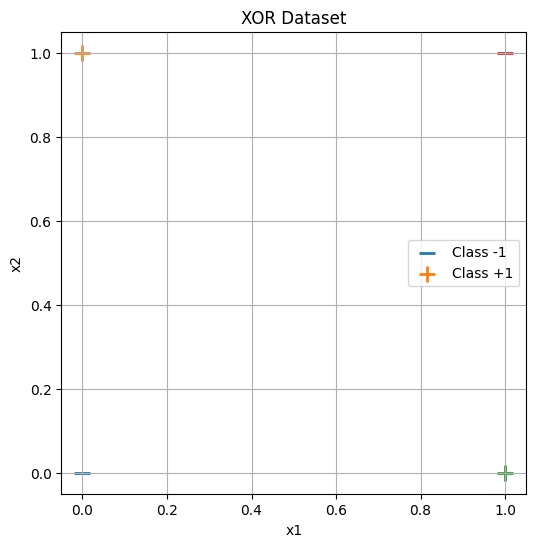

<ipython-input-12-5f19955d354d>:45: RuntimeWarning: invalid value encountered in scalar divide
  plt.axvline(-w_xor[2]/w_xor[0], color='k', linestyle='-', label='Decision Boundary')


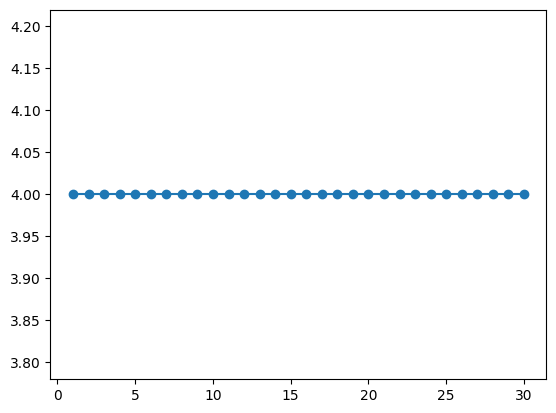

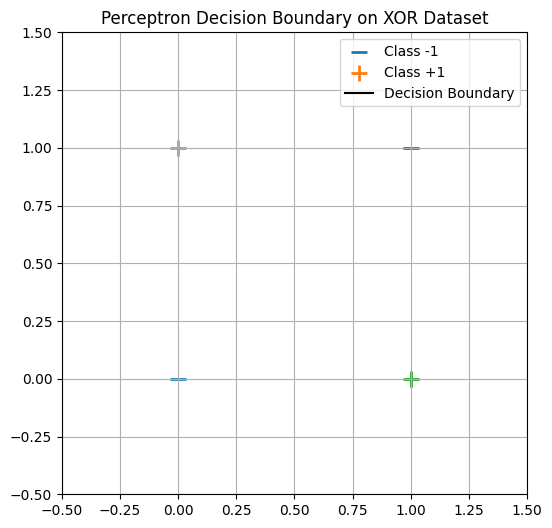

In [12]:

# Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
# Define XOR dataset
X_xor = np.array([
    [0, 0, 1],  # Bias term added
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

y_xor = np.array([-1, 1, 1, -1])

# Plot the XOR dataset
plt.figure(figsize=(6, 6))
for i, sample in enumerate(X_xor):
    if y_xor[i] == -1:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2, label='Class -1' if i == 0 else "")
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2, label='Class +1' if i == 1 else "")

plt.title('XOR Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

# Train Perceptron on XOR dataset
w_xor = perceptron_algo_plot(X_xor, y_xor, eta=1)

# Plot decision boundary
plt.figure(figsize=(6, 6))
for i, sample in enumerate(X_xor):
    if y_xor[i] == -1:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2, label='Class -1' if i == 0 else "")
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2, label='Class +1' if i == 1 else "")

# Decision boundary
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx = np.linspace(x_min, x_max, 100)
if w_xor[1] != 0:
    yy = -(w_xor[0] * xx + w_xor[2]) / w_xor[1]
    plt.plot(xx, yy, 'k-', label='Decision Boundary')
else:
    plt.axvline(-w_xor[2]/w_xor[0], color='k', linestyle='-', label='Decision Boundary')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('Perceptron Decision Boundary on XOR Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [14]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


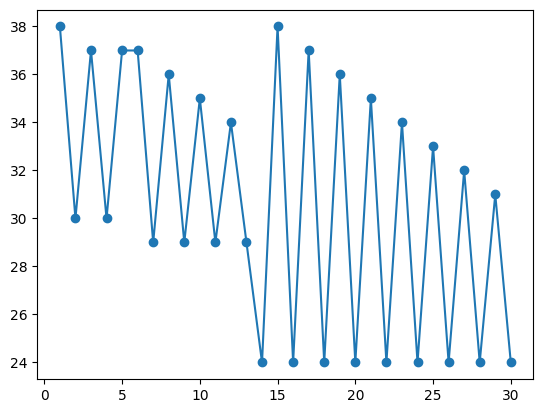

In [15]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

Initial weights: [0. 0.], bias: 0
Epoch 1
Updated weights: [0. 0.], bias: -1
Updated weights: [1. 1.], bias: 0
Epoch 2
Updated weights: [1. 1.], bias: -1
Updated weights: [1. 0.], bias: -2
Updated weights: [2. 1.], bias: -1
Epoch 3
Updated weights: [2. 0.], bias: -2
Updated weights: [1. 0.], bias: -3
Updated weights: [2. 1.], bias: -2
Epoch 4
Updated weights: [1. 1.], bias: -3
Updated weights: [2. 2.], bias: -2
Epoch 5
Updated weights: [2. 1.], bias: -3
Updated weights: [3. 2.], bias: -2
Epoch 6
Updated weights: [3. 1.], bias: -3
Updated weights: [2. 1.], bias: -4
Updated weights: [3. 2.], bias: -3
Epoch 7
Updated weights: [2. 2.], bias: -4
Updated weights: [3. 3.], bias: -3
Epoch 8
Updated weights: [3. 2.], bias: -4
Epoch 9
Epoch 10
Final weights: [3. 2.], bias: -4


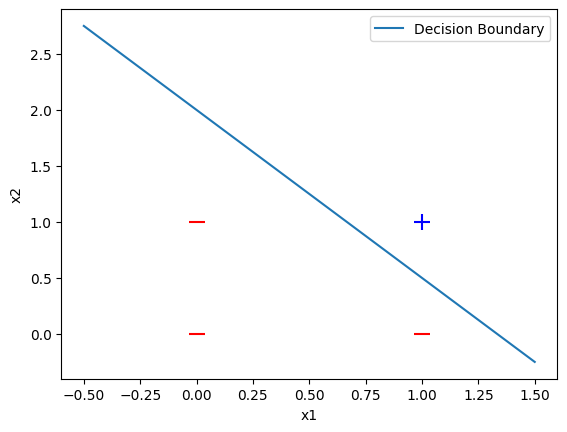

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# AND dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([-1, -1, -1, 1])  # AND function outputs

# Perceptron algorithm
def perceptron(X, y, eta=1, epochs=10):
    w = np.zeros(X.shape[1])  # Initialize weights
    b = 0                     # Initialize bias
    print(f"Initial weights: {w}, bias: {b}")

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}")
        for i, x in enumerate(X):
            if y[i] * (np.dot(x, w) + b) <= 0:  # Misclassified
                w += eta * y[i] * x
                b += eta * y[i]
                print(f"Updated weights: {w}, bias: {b}")
    return w, b

w, b = perceptron(X, y)
print(f"Final weights: {w}, bias: {b}")

# Visualize decision boundary
def plot_decision_boundary(X, y, w, b):
    for i, x in enumerate(X):
        if y[i] == -1:
            plt.scatter(x[0], x[1], s=120, marker='_', color='red')
        else:
            plt.scatter(x[0], x[1], s=120, marker='+', color='blue')

    # Plot decision boundary
    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(w[0] * x1 + b) / w[1]
    plt.plot(x1, x2, label="Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()

plot_decision_boundary(X, y, w, b)


In [17]:
from itertools import product

# Generate all possible 2-bit binary inputs
X = np.array(list(product([0, 1], repeat=2)))

# Generate all possible outputs for 16 Boolean functions
all_functions = list(product([-1, 1], repeat=4))

def is_linearly_separable(X, y):
    """Check if a function is linearly separable."""
    w = np.zeros(X.shape[1])  # Initialize weights
    b = 0                     # Initialize bias
    eta = 1                   # Learning rate
    epochs = 10

    for _ in range(epochs):
        misclassified = False
        for i, x in enumerate(X):
            if y[i] * (np.dot(x, w) + b) <= 0:  # Misclassified
                w += eta * y[i] * x
                b += eta * y[i]
                misclassified = True
        if not misclassified:
            return True  # No misclassifications
    return False  # Not linearly separable

# Evaluate all functions
linearly_separable = []
non_separable = []

for function in all_functions:
    y = np.array(function)
    if is_linearly_separable(X, y):
        linearly_separable.append(function)
    else:
        non_separable.append(function)

print(f"Number of linearly separable functions: {len(linearly_separable)}")
print(f"Number of non-linearly separable functions: {len(non_separable)}")
print("Non-linearly separable functions:")
for f in non_separable:
    print(f)

# Example truth table for XOR
print("\nExample Truth Table for XOR:")
print("x1 | x2 | y")
for x, y in zip(X, non_separable[0]):  # Assume XOR is the first
    print(f"{x[0]}  | {x[1]}  | {y}")


Number of linearly separable functions: 14
Number of non-linearly separable functions: 2
Non-linearly separable functions:
(-1, 1, 1, -1)
(1, -1, -1, 1)

Example Truth Table for XOR:
x1 | x2 | y
0  | 0  | -1
0  | 1  | 1
1  | 0  | 1
1  | 1  | -1
